# <img src="https://github.com/JuliaLang/julia-logo-graphics/raw/master/images/julia-logo-color.png" height="100" /> _Colab Notebook Template_

## Instructions
1. Work on a copy of this notebook: _File_ > _Save a copy in Drive_ (you will need a Google account). Alternatively, you can download the notebook using _File_ > _Download .ipynb_, then upload it to [Colab](https://colab.research.google.com/).
2. If you need a GPU: _Runtime_ > _Change runtime type_ > _Harware accelerator_ = _GPU_.
3. Execute the following cell (click on it and press Ctrl+Enter) to install Julia, IJulia and other packages (if needed, update `JULIA_VERSION` and the other parameters). This takes a couple of minutes.
4. Reload this page (press Ctrl+R, or ⌘+R, or the F5 key) and continue to the next section.

_Notes_:
* If your Colab Runtime gets reset (e.g., due to inactivity), repeat steps 2, 3 and 4.
* After installation, if you want to change the Julia version or activate/deactivate the GPU, you will need to reset the Runtime: _Runtime_ > _Factory reset runtime_ and repeat steps 3 and 4.

In [ ]:
%%shell
set -e

#---------------------------------------------------#
JULIA_VERSION="1.8.2" # any version ≥ 0.7.0
JULIA_PACKAGES="IJulia BenchmarkTools"
JULIA_PACKAGES_IF_GPU="CUDA" # or CuArrays for older Julia versions
JULIA_NUM_THREADS=2
#---------------------------------------------------#

if [ -z `which julia` ]; then
  # Install Julia
  JULIA_VER=`cut -d '.' -f -2 <<< "$JULIA_VERSION"`
  echo "Installing Julia $JULIA_VERSION on the current Colab Runtime..."
  BASE_URL="https://julialang-s3.julialang.org/bin/linux/x64"
  URL="$BASE_URL/$JULIA_VER/julia-$JULIA_VERSION-linux-x86_64.tar.gz"
  wget -nv $URL -O /tmp/julia.tar.gz # -nv means "not verbose"
  tar -x -f /tmp/julia.tar.gz -C /usr/local --strip-components 1
  rm /tmp/julia.tar.gz

  # Install Packages
  nvidia-smi -L &> /dev/null && export GPU=1 || export GPU=0
  if [ $GPU -eq 1 ]; then
    JULIA_PACKAGES="$JULIA_PACKAGES $JULIA_PACKAGES_IF_GPU"
  fi
  for PKG in `echo $JULIA_PACKAGES`; do
    echo "Installing Julia package $PKG..."
    julia -e 'using Pkg; pkg"add '$PKG'; precompile;"' &> /dev/null
  done

  # Install kernel and rename it to "julia"
  echo "Installing IJulia kernel..."
  julia -e 'using IJulia; IJulia.installkernel("julia", env=Dict(
      "JULIA_NUM_THREADS"=>"'"$JULIA_NUM_THREADS"'"))'
  KERNEL_DIR=`julia -e "using IJulia; print(IJulia.kerneldir())"`
  KERNEL_NAME=`ls -d "$KERNEL_DIR"/julia*`
  mv -f $KERNEL_NAME "$KERNEL_DIR"/julia

  echo ''
  echo "Successfully installed `julia -v`!"
  echo "Please reload this page (press Ctrl+R, ⌘+R, or the F5 key) then"
  echo "jump to the 'Checking the Installation' section."
fi

Installing Julia 1.8.2 on the current Colab Runtime...
2023-06-16 13:24:30 URL:https://storage.googleapis.com/julialang2/bin/linux/x64/1.8/julia-1.8.2-linux-x86_64.tar.gz [135859273/135859273] -> "/tmp/julia.tar.gz" [1]
Installing Julia package IJulia...
Installing Julia package BenchmarkTools...
Installing IJulia kernel...
[ Info: Installing julia kernelspec in /root/.local/share/jupyter/kernels/julia-1.8

Please reload this page (press Ctrl+R, ⌘+R, or the F5 key) then
jump to the 'Checking the Installation' section.


# Checking the Installation
The `versioninfo()` function should print your Julia version and some other info about the system:

In [1]:
versioninfo()

Julia Version 1.8.2
Commit 36034abf260 (2022-09-29 15:21 UTC)
Platform Info:
  OS: Linux (x86_64-linux-gnu)
  CPU: 2 × Intel(R) Xeon(R) CPU @ 2.20GHz
  WORD_SIZE: 64
  LIBM: libopenlibm
  LLVM: libLLVM-13.0.1 (ORCJIT, broadwell)
  Threads: 2 on 2 virtual cores
Environment:
  LD_LIBRARY_PATH = /usr/local/nvidia/lib:/usr/local/nvidia/lib64
  JULIA_NUM_THREADS = 2


In [2]:
using Pkg

In [3]:
Pkg.add("Plots")
Pkg.add("LaTeXStrings")

    Updating registry at `~/.julia/registries/General.toml`
   Resolving package versions...
   Installed x265_jll ───────────────────── v3.5.0+0
   Installed JpegTurbo_jll ──────────────── v2.1.91+0
   Installed GR_jll ─────────────────────── v0.72.7+0
   Installed libfdk_aac_jll ─────────────── v2.0.2+0
   Installed Libmount_jll ───────────────── v2.35.0+0
   Installed LERC_jll ───────────────────── v3.0.0+1
   Installed Opus_jll ───────────────────── v1.3.2+0
   Installed LoggingExtras ──────────────── v1.0.0
   Installed Xorg_xkbcomp_jll ───────────── v1.4.2+4
   Installed Measures ───────────────────── v0.3.2
   Installed RelocatableFolders ─────────── v1.0.0
   Installed ConcurrentUtilities ────────── v2.2.0
   Installed Grisu ──────────────────────── v1.0.2
   Installed Unitful ────────────────────── v1.14.0
   Installed Contour ────────────────────── v0.6.2
   Installed Xorg_xcb_util_wm_jll ───────── v0.4.1+1
   Installed Xorg_xcb_util_image_jll ────── v0.4.0+1
   Installed Rec

In [4]:
using Plots
using LaTeXStrings

# Modelo de Hodgkin-Huxley
El modelo de Hodgkin-Huxley fue propuesto en 1952 tras haber estudiado la fisiología del axón gigante del calamar y marcó un hito en historia de la neurociencia, a partir de ese momento muchos modelos se han desarrollado tomándolo como base. En su forma clásica el modelo se define como un sistema de cuatro equaciones diferenciales como se muestra a continuación:

\begin{align*}
 C_m \frac{dV}{dt} &= -g_{Na}m^3h(V-E_{Na}) - g_K n^4 (V - E_K) \\
                   &- g_L (V - E_L) + I_{ext} \\
 \frac{1}{\gamma(T)} \frac{dn}{dt} &= \alpha_n(V) (1 - n) - \beta_n(V)n = \frac{n^{\infty}(V) - n}{\tau_n(V)} \\
 \frac{1}{\gamma(T)} \frac{dm}{dt} &= \alpha_m(V) (1 - m) - \beta_m(V)m = \frac{m^{\infty}(V) - m}{\tau_m(V)} \\
 \frac{1}{\gamma(T)} \frac{dh}{dt} &= \alpha_h(V) (1 - h) - \beta_h(V)h = \frac{h^{\infty}(V) - h}{\tau_h(V)} \\
 \tau_n(V) &= \frac{1}{\alpha_n(V) + \beta_n(V)} \\
 n_{\infty}(V) &= \frac{\alpha_n(V)}{\alpha_n(V) + \beta_n(V)}
\end{align*}

en donde:
* $V$ la diferencia de potencial en la membrana
* $C_m = 1.0\ \mu\text{F/cm}^2$ la capacitancia de la membrana por unidad de área
* $g_{Na} = 120\ \text{mS/cm}^2$ la conductancia máxima por unidad de área para el sodio
* $g_{K} = 36\ \text{mS/cm}^2$ la conductancia máxima por unidad de área para el potasio
* $g_{L} = 0.3\ \text{mS/cm}^2$ la conductancia adicional, independiente del voltaje
* $E_{Na} = 55\ \text{mV}$ el voltaje de la batería en la compuerta de sodio
* $E_{K} = -72\ \text{mV}$ el voltaje de la batería en la compuerta de potasio
* $E_{L} = -49.387\ \text{mV}$ el voltaje filtrado
* $\gamma(T)$ es una constante de proporcionalidad temporal que depende de la temperatura $T$, a $6.3°$C vale $1$ [Cessac2009].

para el caso del calamar.  Los potenciales están medidos considerando que la membrana se encuentra en su potencial de reposo a los $V_r = -60\ \text{mV}$.  Las corrientes $I$ están medidas en $\mu$A/cm$^2$.

Las funciones de transición $\alpha(V)$ y $\beta(V)$, fueron determinadas experimentalmente.  Su forma general es:
\begin{align}
  \alpha(V) \text{ ó } \beta(V) = \frac{A + BV}{C + H e^{\left(\frac{V+D}{F}\right)}}
\end{align}
donde $V$ está medido con respecto al potencial de reposo $V_r$.

Los valores medidos por Hodkin y Huxley para la compuerta de **potasio (K)**, fueron:

\begin{align}
  \alpha_n(V) &= \frac{0.01(10 - V)}{e^{\left(\frac{10-V}{10}\right)} - 1}
\end{align}

\begin{align}
  \beta_n(V) = 0.125 e^{-\frac{V}{80}}
\end{align}

Observemos que cuando $V = 10$ la función $\alpha_n$ está indefinida.  Utilizando la regla de L'Hopital, se calcula el límite:
\begin{align}
  \alpha_n(10) = \frac{-0.01}{e^{\left(\frac{10-V}{10}\right)}(-0.1)} = \frac{-0.01}{-0.1} = 0.1
\end{align}

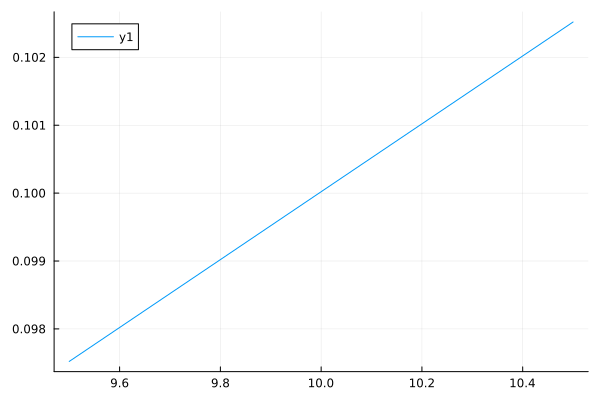

In [5]:
## Programa las función alfa_n como función del voltaje V.
## Necesitarás definir un caso especial cuando V - 10 < epsilon
## Utiliza esta celda para ver como se comporta tu función en esta vecindad
## y elegir un valor de epsilon adecuado

function alpha_n(V)
    if V==10
        return 0.1
    else
    0.01(10-V)/(exp((10-V)/10)-1)
    end
end


plot(alpha_n, 9.5:10.5)

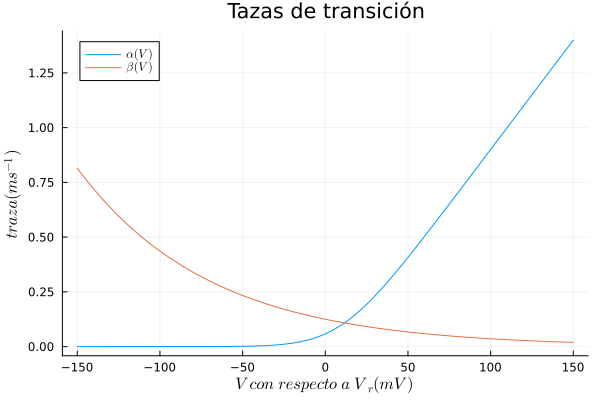

In [6]:
## Programa la funciones como función del voltaje V, para la compuerta de K
## Genera luego una gráfica de alfa_n y beta_n
function beta_n(V)
   0.125*exp(-V/80)
end


function plotAlpha()
    V = -150:150

    plot(
        V,
        alpha_n,
        title="Tazas de transición",
        xlabel=L"V\ con\ respecto\ a\ V_r (mV)",
        ylabel=L"traza (ms^{-1})",
        label=L"\alpha(V)"
    )
    plot!( beta_n, V, label=L"\beta(V)")
end


plotAlpha()

Las funciones para el **sodio (Na)** son:
\begin{align}
  \alpha_m(V) &= \frac{0.1(25 - V)}{e^{\left(\frac{25-V}{10}\right)} - 1}
\end{align}

\begin{align}
  \beta_m(V) &= 4 e^{-\frac{V}{18}}
\end{align}

\begin{align}
  \alpha_h(V) &= 0.07 e^{-\frac{V}{20}}
\end{align}

\begin{align}
  \beta_h(V) &= \frac{1}{e^{\left(\frac{30-V}{10}\right)} + 1}
\end{align}

Para $\alpha_m$ cuando $V = 25$, utilizamos la regla de L'Hopital para calcular el límite:
\begin{align}
  \alpha_m(25) = \frac{-0.1}{e^{\left(\frac{25-V}{10}\right)}(-0.1)} = \frac{-0.1}{-0.1} = 1
\end{align}

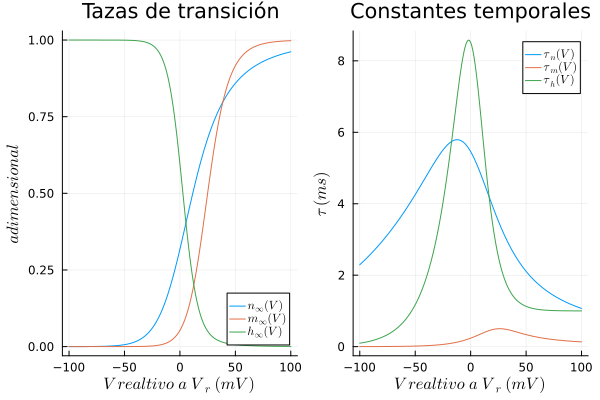

In [7]:
## Dadas alfa y beta, calcular ahora y graficar n y tau para ambos canales.

## Agrega las funciones correspondientes para la compuerta de sodio también,
## deduce sus definiciones a partir de las llamadas en la función para graficar


function alpha_m(V)
    if V==25
        return 1
    else
    0.1*(25-V)/(exp((25-V)/10)-1)
    end
end


function beta_m(V)
    4*exp(-V/18)
end


function alpha_h(V)
    0.07*exp(-V/20)
end


function beta_h(V)
    1/(exp((30-V)/10)+1)
end


function tau_inf(alpha, beta)
    1/(alpha+beta)
end


function n_inf(alpha, beta)
    alpha/(alpha+beta)
end
    n_inf_n(V) = n_inf(alpha_n(V), beta_n(V))
    tau_inf_n(V) = tau_inf(alpha_n(V), beta_n(V))

    n_inf_m(V) = n_inf(alpha_m(V), beta_m(V))
    tau_inf_m(V) = tau_inf(alpha_m(V), beta_m(V))

    n_inf_h(V) = n_inf(alpha_h(V), beta_h(V))
    tau_inf_h(V) = tau_inf(alpha_h(V), beta_h(V))

function plotParameters()
    V = -100:100


   p1 = plot(
        V,
        [n_inf_n, n_inf_m, n_inf_h],
        label=[L"n_{\infty}(V)" L"m_{\infty}(V)" L"h_{\infty}(V)"]
    )

    p2 = plot(
        V,
        [tau_inf_n, tau_inf_m, tau_inf_h],
        label=[L"\tau_{n}(V)" L"\tau_{m}(V)" L"\tau_{h}(V)"]
    )

    plot(
        p1,
        p2,
        layout=(1, 2),
        title=["Tazas de transición" "Constantes temporales"],
        xlabel=[L"V\ realtivo\ a\ V_r\ (mV)" L"V\ realtivo\ a\ V_r\ (mV)"],
        ylabel=[L"adimensional" L"\tau\ (ms)"],
        legend=true
    )
end


plotParameters()

![tasas_constantes](figuras/tazas-y-constantes.jpg)

## Simulación con el método numérico de Euler

El método de Euler realiza una aproximación a la función por su tangente.  Dada una ecuación diferencial de la forma:

\begin{align}
  \frac{dy(t)}{dt} = f(y(t))
\end{align}

Partimos de un punto inicial $(t_0, y_0)$ y calculamos el valor de $y$ para el tiempo $t + \Delta t$ en dicho punto iterativamente como:

\begin{align}
  y(t + \Delta t) &= y(t) + \Delta t f(y(t))
\end{align}

El error aproximado por realizar esta aproximación es:
\begin{align}
  E =& \frac{1}{2} \frac{df(t)}{dt}(\Delta t)^2
\end{align}

Aplicando esta fórmula a la ecuación para los canales:

\begin{align}
 \frac{dn}{dt} &= \frac{n^{\infty}(V) - n}{\tau_n(V)}
\end{align}

Obtenemos:

\begin{align}
 n(t + \Delta t) =& n(t) + \Delta t \left[\frac{n^{\infty}(V)}{\tau_n} - \frac{n(t)}{\tau_n(V)} \right] \\
                 =& \left[ 1 - \frac{\Delta t}{\tau_n(V)} \right] n(t) + \frac{\Delta t}{\tau_n(V)}n^{\infty}(V)
\end{align}

Se obtienen fórmulas análogas para $m$ y $h$.  Todas juntas pueden ser escritas en forma matricial:

\begin{align}
  \begin{bmatrix}
  n(t + \Delta t) \\
  m(t + \Delta t) \\
  h(t + \Delta t)
  \end{bmatrix} =&
  \begin{bmatrix}
  (1 - \Delta t/\tau_n(V)) & 0 & 0 \\
  0 & (1 - \Delta t/\tau_m(V)) & 0 \\
  0 & 0 & (1 - \Delta t/\tau_h(V)) \\
  \end{bmatrix}
  \begin{bmatrix}
  n(t) \\
  m(t) \\
  h(t)
  \end{bmatrix} +
  \begin{bmatrix}
  (\Delta t / \tau_n(V)) n^{\infty}(V) \\
  (\Delta t / \tau_m(V)) m^{\infty}(V) \\
  (\Delta t / \tau_h(V)) h^{\infty}(V)
  \end{bmatrix}
\end{align}

Brevemente:

\begin{align}
  \boldsymbol{\Pi}(t + \Delta t) =& \boldsymbol{A}_\pi \boldsymbol{\Pi}(t) + \boldsymbol{B}_\pi
\end{align}

Se debe realizar el mismo procedimiento con la ecuación diferencial para el voltaje.  Para simplificar la notación, introduzcamos:

\begin{align}
  G_{Na} = g_{Na}m^3h
\end{align}

\begin{align}
  G_{K} = g_K n^4
\end{align}

Entonces:
\begin{align}
 C_m \frac{dV}{dt} &= -g_{Na}m^3h(V-E_{Na}) - g_K n^4 (V - E_K) - g_L (V - E_L) + I_{ext} \\
 \frac{dV}{dt} &= -\frac{G_{Na}}{C_m}(V-E_{Na}) - \frac{G_K}{C_m} (V - E_K) - \frac{g_L}{C_m} (V - E_L) + \frac{1}{C_m}I_{ext}
\end{align}

Utilizando el método de Euler:

\begin{align}
 V(t + \Delta t) &= V(t) - \frac{\Delta t}{C_m} \left[ G_{Na}(V-E_{Na}) + G_K (V - E_K) + g_L (V - E_L) + I_{ext}(t) \right] \\
 V(t + \Delta t) &= V(t) - \Delta t \begin{bmatrix} \frac{G_{Na}}{C_m} & \frac{G_K}{C_m} & \frac{g_L}{C_m} \end{bmatrix}  \begin{bmatrix}
                 V(t)-E_{Na} \\
                 V(t)- E_K \\
                 V(t) - E_L
                \end{bmatrix} + \frac{\Delta t}{C_m}I_{ext}(t)
\end{align}

Para los valores por defecto propuestos en la celda siguiente, programar una simulación utilizando los resultados obtenidos con el método de Euler y produce la figura siguiente:

![simulacion](figuras/Simulacion.png)

In [8]:
# NOTA
# Los diccionarios son objectos que almacenan datos de la forma llave-valor (key-value)
# muy útiles para trabajar con información que tiene que ser etiquetada. Puedes encontrar más
# información sobre como trabajar con ellos en la documentación oficial de Julia:
# https://docs.julialang.org/en/v1/base/collections/#Dictionaries

pm = Dict(
    "DeltaT" => 0.01,   # ms
    "maxT" => 50.0,     # ms
    "V0" => 0.0,        # mV
    "gNa" => 120.0,     # mS/cm2
    "gK" => 36.0,
    "gL" => 0.3,
    "Cm" => 1.0,        # micro F/cm2
    "ENa" => 115.0,     # Utilizando la convensión original de Hodkin-Huxley
    "EK" => -12.0,
    "EL" => 10.613
)

function Iext(t,t0,tfin,current) #Aquí se define la corriente externa
        if (t>t0) && (t<tfin)
            return current # micro A/cm2
        else
            return 0
        end
end

Iext (generic function with 1 method)

In [9]:
#Usaremos las funciones del notebook del Método de Euler
function tamanoDePaso(t0,tf,N)
    return (tf-t0)/N #Aquí se usa la expresión definida por el profesor.
end


function arregloUniforme(t0,tf,N,h)
    if (typeof(N) != Int64) || N<0 #Aquí se evalúa si N no es un entero positivo.
        println("Error: ", N, " no es un número entero positivo.")

    else

        t=zeros(1,N+1) #Aquí se guardan los t_i
        t[1]=t0 #Aquí se guarda t0 en la primer entrada del vector
        t[N+1]=tf #Aquí se guarda tf en la última entrada del vector
        for i in 2:N
             t[i] = t[1]+(i-1)*h #Aquí se calculan los t_i
        end

    return t

    end
end



arregloUniforme (generic function with 1 method)

In [10]:
#Se define la función paso euler para cada función del sistema de ecuaciones
function paso_euler_1(ti, xti, yti, zti, vti, f, h, t_0,t_fin,cur_rent)
    return xti+h*f(ti, xti, yti, zti, vti,t_0,t_fin,cur_rent) #Aquí se utiliza la expresión x_ti que deduce el profesor.
end

function paso_euler_2(ti, xti, yti, zti, vti, g, h)
    return yti+h*g(ti, xti, yti, zti, vti) #Aquí se utiliza la expresión x_ti que deduce el profesor.
end

function paso_euler_3(ti, xti, yti, zti, vti, j, h)
    return zti+h*j(ti, xti, yti, zti, vti) #Aquí se utiliza la expresión x_ti que deduce el profesor.
end

function paso_euler_4(ti, xti, yti, zti, vti, k, h)
    return vti+h*k(ti, xti, yti, zti, vti) #Aquí se utiliza la expresión x_ti que deduce el profesor.
end

paso_euler_4 (generic function with 1 method)

In [11]:
#Esta es la función que realizará las aproximaciones de las funciones con el método de euler.
function euler4x4(f, g, j, k, xt0, yt0, zt0, vt0,t,t0,tf,N,t_0,t_fin,cur_rent)
    xt=zeros(1,N+1) #Aquí se guardan los xt
    yt=zeros(1,N+1) #Aquí se guardan los yt
    zt=zeros(1,N+1) #Aquí se guardan los zt
    vt=zeros(1,N+1) #Aquí se guardan los vt
#Se guardan las condiciones iniciales de cada función del sistema de ecuaciones.
    xt[1]=xt0
    yt[1]=yt0
    zt[1]=zt0
    vt[1]=vt0
#Aquí se obiene xti, yti, zti, vti a partir de su término anterior
    for i in 2:N+1
        xt[i]=paso_euler_1( t[i-1], xt[i-1], yt[i-1], zt[i-1], vt[i-1], f, tamanoDePaso(t0,tf,N),t_0,t_fin,cur_rent)
        yt[i]=paso_euler_2( t[i-1], xt[i-1], yt[i-1], zt[i-1], vt[i-1], g, tamanoDePaso(t0,tf,N))
        zt[i]=paso_euler_3( t[i-1], xt[i-1], yt[i-1], zt[i-1], vt[i-1], j, tamanoDePaso(t0,tf,N))
        vt[i]=paso_euler_4( t[i-1], xt[i-1], yt[i-1], zt[i-1], vt[i-1], k, tamanoDePaso(t0,tf,N))
    end
    return [xt,yt,zt,vt]
end

euler4x4 (generic function with 1 method)

In [12]:
#Aquí se definen las derivadas de las funciones incógnita que forman el sistema de ecuaciones.

Volt=function Volt(t,v,n,m,h,t_0,t_fin,cur_rent)
return -pm["gNa"]*(m^3)*h*(v-pm["ENa"])-pm["gK"]*n^4*(v-pm["EK"])-pm["gL"]*(v-pm["EL"])+Iext(t,t_0,t_fin,cur_rent)
end


N1=function N1(t,v,n,m,h)
return (n_inf_n(v)-n)/tau_inf_n(v)
end

M1=function M1(t,v,n,m,h)
return (n_inf_m(v)-m)/tau_inf_m(v)
end


H1=function H1(t,v,n,m,h)
return (n_inf_h(v)-h)/tau_inf_h(v)
end

G_Na=function G_Na(m,h)
return pm["gNa"]*(m^3)*h
end

G_k=function G_k(n)
return pm["gK"]*n^4
end


G_k (generic function with 1 method)

In [13]:
# Implementa aquí el resultado del algoritmo de intregración numérica de Euler para calcular V(t).
# Asegúrate de que, al ejecutar la simulación con los parámetros por defecto, se reproduce la imagen de arriba.
# Después prueba con pulsos de t en 10->30, con corrientes de 10 y -10 microamperes
# ¿Qué observas?
# Inserta al final una celda con tus comentarios y resultados

function EulerHodkinHuxley(pm,t_0,t_fin,cur_rent)

T=arregloUniforme(0,50,5000,tamanoDePaso(0,50,5000))
EU=euler4x4(Volt,N1,M1,H1,pm["V0"],0.35,0.1,0.6,T,0,50,5000,t_0,t_fin,cur_rent) #Aquí se obtienen las aproximaciones de las funciones del sistema de ecuaciones.
EU1=transpose(EU[1]) #Aproximación de Volt
EU2=transpose(EU[2]) #Aproximación de n
EU3=transpose(EU[3]) #Aproximación de m
EU4=transpose(EU[4]) #Aprozimación de h
T_TRANS=transpose(T)
TG_Na=zeros(1,5000+1) #Aquí se guardará la aproximación de GNa(t)
TG_k=zeros(1,5000+1)  #Aquí se guardará la aproximación de Gk(t)
Ttau_inf_n=zeros(1,5000+1) #Aquí se guardará la aproximación de tau_inf_n(t)
Ttau_inf_m=zeros(1,5000+1) #Aquí se guardará la aproximación de tau_inf_m(t)
Ttau_inf_h=zeros(1,5000+1) #Aquí se guardará la aproximación de tau_inf_h(t)

#Aquí se calculan GNa, Gk, Tn, Tm, Th a partir de las aproximaciones de n, m y h.
for i in 1:5000+1
    TG_Na[i]=G_Na(EU3[i],EU4[i])
    TG_k[i]=G_k(EU2[i])
    Ttau_inf_n[i]=tau_inf_n(EU1[i])
    Ttau_inf_m[i]=tau_inf_m(EU1[i])
    Ttau_inf_h[i]=tau_inf_h(EU1[i])
end

#Aquí se calculan las transpuestas de GNa, Gk, Tn, Tm, Th para tenerlos en forma de vector y graficarlas.
TG_Na_tra=transpose(TG_Na)
TG_k_tra=transpose(TG_k)
Ttau_inf_n_tra=transpose(Ttau_inf_n)
Ttau_inf_m_tra=transpose(Ttau_inf_m)
Ttau_inf_h_tra=transpose(Ttau_inf_h)

#Aquí se devuelven las aproximaciones de las funciones según su clave.
   return Dict(
    "T" => T_TRANS,   # ms
    "V" => EU1,     # ms
    "GK" => TG_k_tra,        # mV
    "GNa" => TG_Na_tra,     # mS/cm2
    "n" => EU2,
    "m" => EU3,
    "h" => EU4,        # micro F/cm2
    "tauN" => Ttau_inf_n_tra,     # Utilizando la convensión original de Hodkin-Huxley
    "tauM" => Ttau_inf_m_tra,
    "tauH" => Ttau_inf_h_tra
)
end

EulerHodkinHuxley (generic function with 1 method)

In [14]:
#Esta función es para graficar las funciones del sistema de ecuciones.
function plotSimulation(resultado)
    tiempo = resultado["T"]

    p1 = plot(tiempo, resultado["V"], label=L"V")
    p2 = plot(tiempo, [resultado["GK"], resultado["GNa"]], label=[L"G_{K}" L"G_{Na}"])
    p3 = plot(tiempo, [resultado["n"], resultado["m"], resultado["h"]], label=[L"n" L"m" L"h"])
    p4 = plot(tiempo, [resultado["tauN"], resultado["tauM"], resultado["tauH"]], label=[L"\tau_n" L"\tau_m" L"\tau_h"])

    plot(
        p1,
        p2,
        p3,
        p4,
        layout=(2, 2),
        title=["Voltaje en la membrana" "Conductancia de los canales" "Tazas de transición" "Constantes temporales"],
        xlabel=L"t (ms)",
        ylabel=["Vr en la membrana (mV)" "Conductancia (mS/cm^2)" "Adimensional" L"\tau (ms)"],
        legend=true
    )
end



plotSimulation (generic function with 1 method)

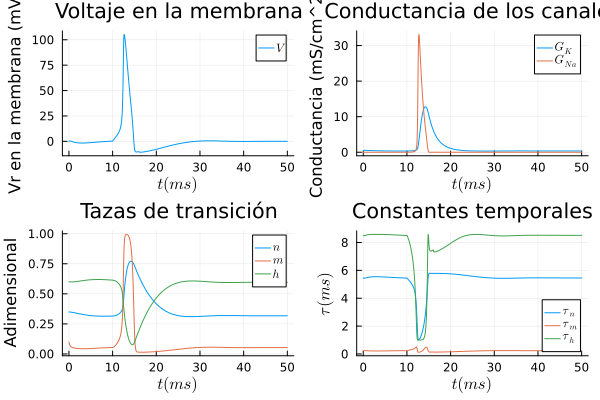

In [15]:
plotSimulation(EulerHodkinHuxley(pm,10,16,6.5))

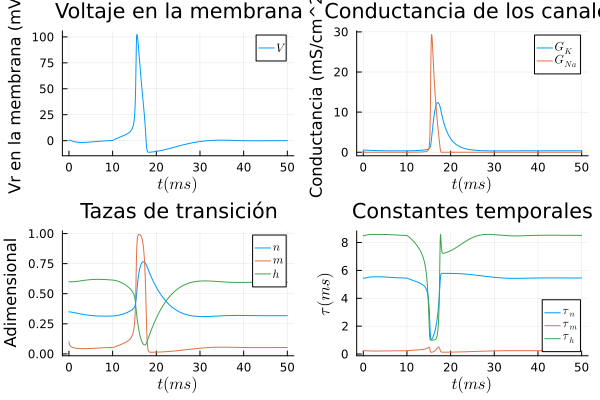

In [16]:
function simulaHodkinHuxley(V_0, t_0, t_fin, cur_rent)
    pm["V0"] = V_0
    resultado = EulerHodkinHuxley(pm,t_0,t_fin,cur_rent)
    plotSimulation(resultado)
end


V0 = 0
t0 = 10
tfin = 16 # seleccionar de: -90 a 120
current = 2.4 # seleccionar de: -10 a 10

simulaHodkinHuxley(0, 10, 16, 2.4)

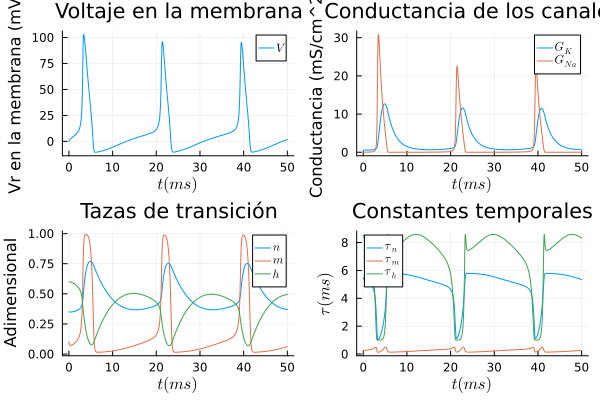

In [17]:
simulaHodkinHuxley(0, 0, 50, 6.5)

# Comentarios y resultados
Escribe aquí tus resultados

Si la corriente externa es menor a 4.06𝜇𝐴, no se produce el potencial de acción, que corresponde con el fenómeno de todo o nada para que se produzca el potencial de acción.

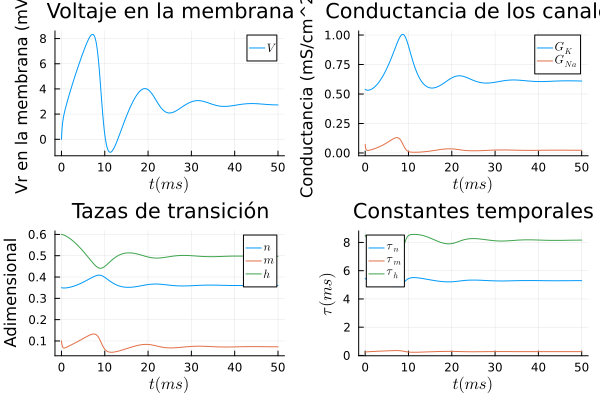

In [18]:
simulaHodkinHuxley(0, 0, 50, 4.05)

Si la corriente externa es mayor a 4.07𝜇𝐴/cm^2, se produce el potencial de acción, alcanzando un máximo alrededor de los 100𝑚𝑉, que a comparación del caso anterior, la amplitud llegaba hasta los 10𝑚𝑉.

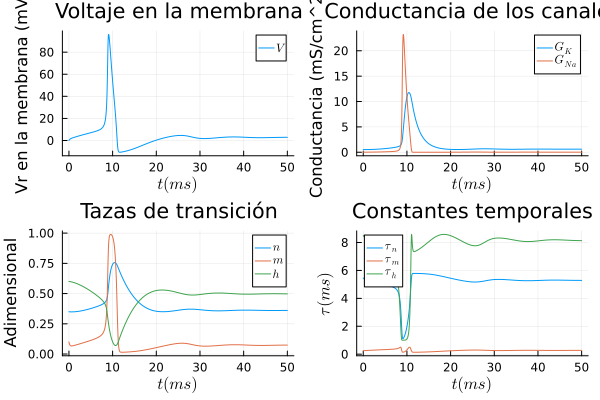

In [19]:
simulaHodkinHuxley(0, 0, 50, 4.07)

Si la corriente externa es mayor igual a 6𝜇𝐴/cm^2, se produce potenciales de acción sucesivos.

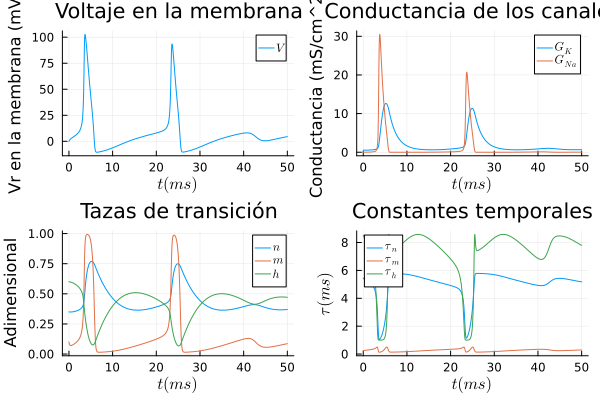

In [20]:
simulaHodkinHuxley(0, 0, 50, 6)